# Assignment 3  
Damion Huppert

In [11]:
import scipy.io
import numpy as np

##### Question 1-a

$$ \| x - T w \|_2^2 = (x - T w)^T (x - T w) $$
$$ (x - T w)^T (x - T w) = (x^T - (Tw)^T) (x - T w) $$
$$ (x^T - (Tw)^T) (x - T w) = (x^T - w^TT^T) (x - T w) $$
$$ (x^T - w^TT^T) (x - T w) = x^Tx - x^TTw - w^TT^Tx + w^TT^TTw \quad \text{note: } - x^TTw - w^TT^Tx = -2w^TT^Tx $$ 
$$ x^Tx -2w^TT^Tx + w^TT^TTw = x^Tx -2w^TT^Tx + w^Tw $$
$$ \frac{\partial}{\partial w} \left( x^T x - 2 w^T T^T x + w^T w \right) = 0 $$
$$ - 2T^T x + 2w = 0 $$
$$  w = T^Tx $$

##### Question 1-b

$$ W = \begin{bmatrix} w_1 & w_2 & \dots & w_p \end{bmatrix} $$
$$ X = \begin{bmatrix} x_1 & x_2 & \dots & x_p \end{bmatrix} $$
By the previous calculation we know $ w = T^Tx $ so we can write $W$ as:  
$$ W = \begin{bmatrix} T^Tx_1 & T^Tx_2 & \dots & T^Tx_p \end{bmatrix} $$
$$ W = T^TX $$

##### Question 2-a

In [12]:
# from wikipedia
def gram_schmidt(V):
    """ Applies Gram-Schmidt orthogonalization to matrix V. """
    n, k = V.shape
    U = np.zeros((n, k))
    for i in range(n):
        U[:, i] = V[:, i]
        for j in range(i):
            U[:, i] = U[:, i] -  np.dot(U[:, j], V[:, i]) * U[:, j]  # Subtract projections
        U[:, i] = U[:, i] / np.linalg.norm(U[:, i])  # Normalize
    return U

In [14]:
file_path = "movie.mat"
mat_data = scipy.io.loadmat(file_path)


X = mat_data['X']
print("Original movie ratings matrix X:\n", X)
m, n = X.shape
ones_column = np.ones((m, 1))
X_tilde = np.hstack((ones_column, X))
print("Augmented matrix X_tilde:\n", X_tilde)

Q = gram_schmidt(X_tilde)
print("Orthonormal basis vectors (columns of Q):\n", Q)

t1 = np.ones((5,)) / np.sqrt(5)
is_t1_equal = np.allclose(Q[:, 0], t1)
print("Is the first basis vector equal to t1?", is_t1_equal)

Original movie ratings matrix X:
 [[ 4  7  2  8  7  4  2]
 [ 9  3  5  6 10  5  5]
 [ 4  8  3  7  6  4  1]
 [ 9  2  6  5  9  5  4]
 [ 4  9  2  8  7  4  1]]
Augmented matrix X_tilde:
 [[ 1.  4.  7.  2.  8.  7.  4.  2.]
 [ 1.  9.  3.  5.  6. 10.  5.  5.]
 [ 1.  4.  8.  3.  7.  6.  4.  1.]
 [ 1.  9.  2.  6.  5.  9.  5.  4.]
 [ 1.  4.  9.  2.  8.  7.  4.  1.]]
Orthonormal basis vectors (columns of Q):
 [[ 4.47213595e-01 -3.65148372e-01 -6.32455532e-01 -5.16397779e-01
   8.11291088e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47213595e-01  5.47722558e-01  3.16227766e-01 -3.87298335e-01
  -3.23783341e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47213595e-01 -3.65148372e-01  2.24693342e-15  6.45497224e-01
  -1.95491828e-02  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47213595e-01  5.47722558e-01 -3.16227766e-01  3.87298335e-01
   1.28291512e-01  0.00000000e+00  0.00000000e+00  0.00000000e+00]
 [ 4.47213595e-01 -3.65148372e-01  6.32455532e-01 -1.29099445e-01
 

##### Question 2-b

In [43]:
W = np.dot(t1.T, X)
print("Weight matrix W for rank-1 approximation:\n", W)

X_baseline = np.outer(t1, W)
print("Rank-1 approximation of X:\n", X_baseline)

residual_error = X - X_baseline
print("Residual error for rank-1 approximation:\n", residual_error)

Weight matrix W for rank-1 approximation:
 [13.41640786 12.96919427  8.04984472 15.20526225 17.44133022  9.8386991
  5.81377674]
Rank-1 approximation of X:
 [[6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]
 [6.  5.8 3.6 6.8 7.8 4.4 2.6]]
Residual error for rank-1 approximation:
 [[-2.   1.2 -1.6  1.2 -0.8 -0.4 -0.6]
 [ 3.  -2.8  1.4 -0.8  2.2  0.6  2.4]
 [-2.   2.2 -0.6  0.2 -1.8 -0.4 -1.6]
 [ 3.  -3.8  2.4 -1.8  1.2  0.6  1.4]
 [-2.   3.2 -1.6  1.2 -0.8 -0.4 -1.6]]


##### Questoin 2-c

In [50]:
T = Q[:, :2]
print("Taste matrix T (first two basis vectors):\n", np.array_str(T, precision=4, suppress_small=True))

W = np.dot(T.T, X)
print("Weight matrix W for rank-2 approximation:\n", np.array_str(W, precision=4, suppress_small=True))

X_approx = np.dot(T, W)
print("Rank-2 approximation of X:\n", np.array_str(X_approx, precision=4, suppress_small=True))

residual_error_2 = X - X_approx
print("Residual error for rank-2 approximation:\n", np.array_str(residual_error, precision=4, suppress_small=True))

Taste matrix T (first two basis vectors):
 [[ 0.4472 -0.3651]
 [ 0.4472  0.5477]
 [ 0.4472 -0.3651]
 [ 0.4472  0.5477]
 [ 0.4472 -0.3651]]
Weight matrix W for rank-2 approximation:
 [[13.4164 12.9692  8.0498 15.2053 17.4413  9.8387  5.8138]
 [ 5.4772 -6.0249  3.4689 -2.3735  3.1038  1.0954  3.4689]]
Rank-2 approximation of X:
 [[4.     8.     2.3333 7.6667 6.6667 4.     1.3333]
 [9.     2.5    5.5    5.5    9.5    5.     4.5   ]
 [4.     8.     2.3333 7.6667 6.6667 4.     1.3333]
 [9.     2.5    5.5    5.5    9.5    5.     4.5   ]
 [4.     8.     2.3333 7.6667 6.6667 4.     1.3333]]
Residual error for rank-2 approximation:
 [[ 0.     -1.     -0.3333  0.3333  0.3333  0.      0.6667]
 [-0.      0.5    -0.5     0.5     0.5    -0.      0.5   ]
 [ 0.      0.      0.6667 -0.6667 -0.6667  0.     -0.3333]
 [-0.     -0.5     0.5    -0.5    -0.5    -0.     -0.5   ]
 [ 0.      1.     -0.3333  0.3333  0.3333  0.     -0.3333]]


##### Question 2-d

In [51]:
T = Q[:, :3]
print("Taste matrix T (first two basis vectors):\n", np.array_str(T, precision=4, suppress_small=True))

W = np.dot(T.T, X)
print("Weight matrix W for rank-2 approximation:\n", np.array_str(W, precision=4, suppress_small=True))

X_approx = np.dot(T, W)
print("Rank-2 approximation of X:\n", np.array_str(X_approx, precision=4, suppress_small=True))

residual_error_3 = X - X_approx
print("Residual error for rank-2 approximation:\n", np.array_str(residual_error, precision=4, suppress_small=True))

Taste matrix T (first two basis vectors):
 [[ 0.4472 -0.3651 -0.6325]
 [ 0.4472  0.5477  0.3162]
 [ 0.4472 -0.3651  0.    ]
 [ 0.4472  0.5477 -0.3162]
 [ 0.4472 -0.3651  0.6325]]
Weight matrix W for rank-2 approximation:
 [[13.4164 12.9692  8.0498 15.2053 17.4413  9.8387  5.8138]
 [ 5.4772 -6.0249  3.4689 -2.3735  3.1038  1.0954  3.4689]
 [ 0.      1.5811 -0.3162  0.3162  0.3162  0.     -0.3162]]
Rank-2 approximation of X:
 [[4.     7.     2.5333 7.4667 6.4667 4.     1.5333]
 [9.     3.     5.4    5.6    9.6    5.     4.4   ]
 [4.     8.     2.3333 7.6667 6.6667 4.     1.3333]
 [9.     2.     5.6    5.4    9.4    5.     4.6   ]
 [4.     9.     2.1333 7.8667 6.8667 4.     1.1333]]
Residual error for rank-2 approximation:
 [[ 0.     -1.     -0.3333  0.3333  0.3333  0.      0.6667]
 [-0.      0.5    -0.5     0.5     0.5    -0.      0.5   ]
 [ 0.      0.      0.6667 -0.6667 -0.6667  0.     -0.3333]
 [-0.     -0.5     0.5    -0.5    -0.5    -0.     -0.5   ]
 [ 0.      1.     -0.3333  0.3333

#### Question 2-e

In [54]:
# Swap Jake's and Jennifer's ratings (first two columns of X)
X_swapped = X.copy()
X_swapped[:, [0, 1]] = X_swapped[:, [1, 0]]
print("Swapped movie ratings matrix X_swapped:\n", X_swapped)

# Augment X_swapped with a column of ones
X_tilde_swapped = np.hstack((ones_column, X_swapped))

# Apply Gram-Schmidt to the new augmented matrix
Q_swapped = gram_schmidt(X_tilde_swapped)

# Rank-2 approximation for swapped X
T_swapped_rank2 = Q_swapped[:, :2]
W_swapped_rank2 = np.dot(T_swapped_rank2.T, X_swapped)
X_approx_swapped_rank2 = np.dot(T_swapped_rank2, W_swapped_rank2)
residual_error_swapped_rank2 = X_swapped - X_approx_swapped_rank2

print("Residual error for rank-3 approximation (swapped X):\n",np.array_str(residual_error_swapped_rank2 - residual_error_2, precision=4, suppress_small=True))
# Rank-3 approximation for swapped X
T_swapped_rank3 = Q_swapped[:, :3]
W_swapped_rank3 = np.dot(T_swapped_rank3.T, X_swapped)
X_approx_swapped_rank3 = np.dot(T_swapped_rank3, W_swapped_rank3)
residual_error_swapped_rank3 = X_swapped - X_approx_swapped_rank3

print("Residual error for rank-3 approximation (swapped X):\n",np.array_str(residual_error_swapped_rank3 - residual_error_3, precision=4, suppress_small=True))

Swapped movie ratings matrix X_swapped:
 [[ 7  4  2  8  7  4  2]
 [ 3  9  5  6 10  5  5]
 [ 8  4  3  7  6  4  1]
 [ 2  9  6  5  9  5  4]
 [ 9  4  2  8  7  4  1]]
Residual error for rank-3 approximation (swapped X):
 [[-0.      0.0206 -0.6048  0.4089 -0.5704 -0.1959 -0.6048]
 [ 0.      0.1186  0.3557 -0.232   0.3866  0.1237  0.3557]
 [-0.     -0.1289 -0.0533  0.0275 -0.1014 -0.0258 -0.0533]
 [ 0.      0.268  -0.1959  0.1495 -0.0825 -0.0464 -0.1959]
 [-0.     -0.2784  0.4983 -0.354   0.3677  0.1443  0.4983]]
Residual error for rank-3 approximation (swapped X):
 [[ 0. -0.  0. -0.  0.  0.  0.]
 [-0.  0. -0.  0. -0.  0. -0.]
 [ 0.  0. -0.  0.  0.  0. -0.]
 [ 0. -0.  0. -0.  0.  0.  0.]
 [-0.  0. -0.  0. -0. -0. -0.]]


By our test we can see the the 2-rank approximation the results are slightly different and the 3-rank approximation is the same.  

The 2 rank is more affected because it only captures the most significant features  

The 3 rank is not affected because it is able to capture most/all of the significant features 

##### Question 3-a

$$ 
Q = 
\begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix}
$$
$$
Q^{-1} = \frac{1}{1 * 2 - 0} \begin{bmatrix} 2 & 0 \\ 0 & 1 \end{bmatrix} = \begin{bmatrix} 1 & 0 \\ 0 & \frac{1}{2} \end{bmatrix}
$$  
Because this matrix is invertable it is positive definate

##### Question 3-b

$$ 
Q = 
\begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix}
$$
$$ 
x = \begin{bmatrix} x_1 \\ x_2\end{bmatrix}
$$

$$ 
x^T = \begin{bmatrix} x_1 & x_2\end{bmatrix}
$$

$$
y = x^TQx = 
\begin{bmatrix} x_1 & x_2\end{bmatrix}
\begin{bmatrix}
1 & 0 \\
0 & 2
\end{bmatrix}
\begin{bmatrix} x_1 \\ x_2\end{bmatrix}
=
x_1^2 + 2x_2^2
$$

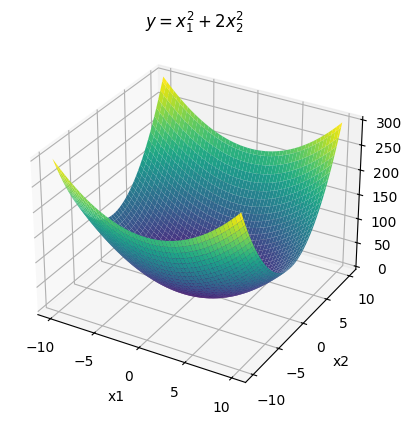

In [56]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

# Define the function
def f(x1, x2):
    return x1**2 + 2*x2**2

# Create a meshgrid for x1 and x2 values
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)

# Compute y values
Y = f(X1, X2)

# Create a 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Plot the surface
ax.plot_surface(X1, X2, Y, cmap='viridis')

# Labels and title
ax.set_xlabel('x1')
ax.set_ylabel('x2')
ax.set_zlabel('y')
ax.set_title('$y = x_1^2 + 2x_2^2$')

# Show the plot
plt.show()


##### Question 4

Since $ Q $ is symmetric ($ Q = Q^T $):
   $$
   QPQ = Q^T P Q.
   $$

$ \forall x \in \mathbb{R}^n \quad x \neq 0 $:
$$
x^T (QPQ) x = x^T Q^T P Q x.
$$
Let $ y = Qx $:
$$
x^T Q^T P Q x = y^T P y.
$$
Since $ P \succ 0 $, $ y^T P y > 0 $ for all $ y \neq 0 $:
$$
x^T (QPQ) x = y^T P y > 0.
$$

Since $ x^T (QPQ) x > 0 $ for all nonzero $ x $, $ QPQ $ is positive definite.
